<a href="https://colab.research.google.com/github/Nadezda-Sut/EEG/blob/main/EEG_Connectivity_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
! pip install mne

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:
pip install --upgrade mne

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


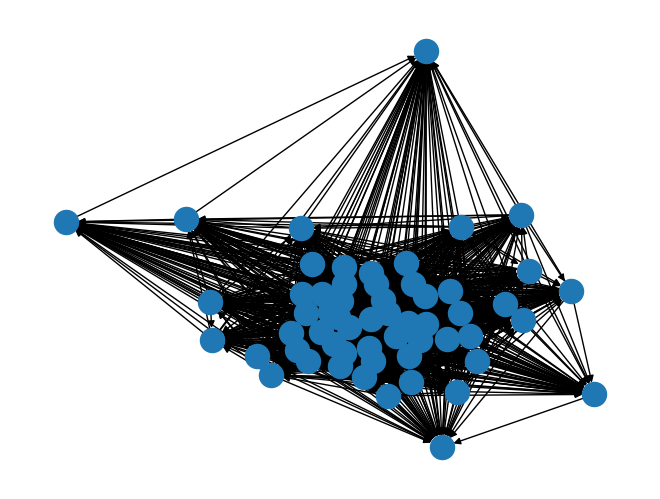

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mne
import networkx as nx

from google.colab import drive
drive.mount('/content/gdrive')

# Load the CSV file and extract the adjacency matrix
# file_path = "/content/gdrive/My Drive/Colab Notebooks/VatEvgDo_matrix_sensors_wpli.csv"
input_data = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/VatEvgDo_matrix_sensors_wpli.csv", index_col=0)
G = nx.DiGraph(input_data.values)
nx.draw(G)


In [14]:
import pandas as pd

file_path = "/content/gdrive/My Drive/Colab Notebooks/VatEvgDo_matrix_sensors_wpli.csv"
data = pd.read_csv(file_path, index_col=0)
adjacency_matrix = data.values


In [15]:
import networkx as nx
from networkx.algorithms import smallworld


In [16]:
graph = nx.from_numpy_array(adjacency_matrix)


In [17]:
swi = smallworld.sigma(graph, niter=10, nrand=10)
print("Small World Index:", swi)


Small World Index: 1.0


Small World Index: 1.0000000000000002


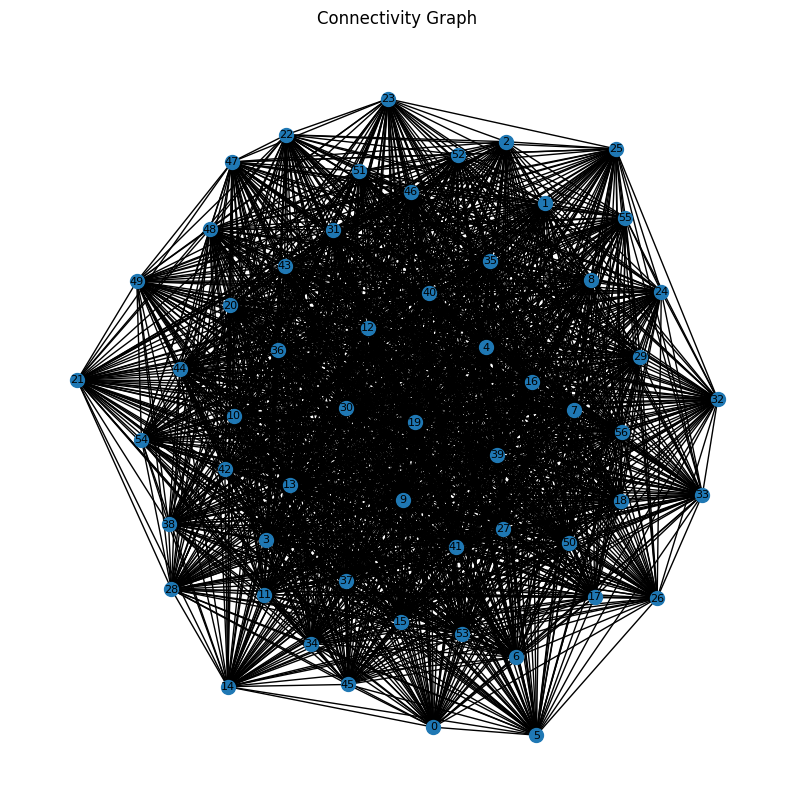

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
from networkx.algorithms import smallworld

file_path = "/content/gdrive/My Drive/Colab Notebooks/VatEvgDo_matrix_sensors_wpli.csv"
data = pd.read_csv(file_path, index_col=0)
adjacency_matrix = data.values

# Calculate the threshold value
threshold = 0.05 * adjacency_matrix.max()

# Create a mask to filter the connections below the threshold
mask = adjacency_matrix >= threshold

# Apply the mask to the adjacency matrix
filtered_matrix = adjacency_matrix * mask

# Create a NetworkX graph from the filtered adjacency matrix
graph = nx.from_numpy_array(filtered_matrix)

# Calculate the Small World Index
swi = smallworld.sigma(graph, niter=10, nrand=10)
print("Small World Index:", swi)

# Plot the graph with labels
pos = nx.spring_layout(graph)  # Define the layout for the nodes
labels = {i: str(i) for i in range(len(graph.nodes()))}  # Create labels for the nodes

plt.figure(figsize=(10, 10))
nx.draw_networkx(graph, pos, labels=labels, with_labels=True, node_size=100, font_size=8)
plt.title("Connectivity Graph")
plt.axis("off")
plt.show()


Small World Index: 1.4497470652045499


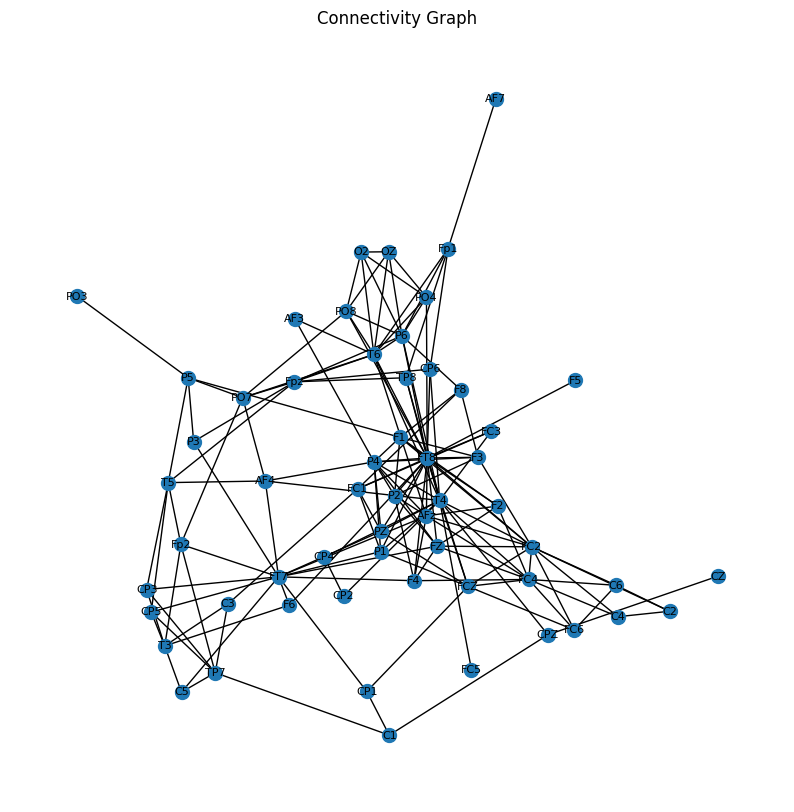

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
from networkx.algorithms import smallworld
import numpy as np

file_path = "/content/gdrive/My Drive/Colab Notebooks/VatEvgDo_matrix_sensors_wpli.csv"
data = pd.read_csv(file_path, index_col=0)
adjacency_matrix = data.values

# Calculate the threshold value
threshold = np.percentile(adjacency_matrix, 95)

# Create a mask to filter the connections below the threshold
mask = adjacency_matrix >= threshold

# Apply the mask to the adjacency matrix
filtered_matrix = adjacency_matrix * mask

# Create a NetworkX graph from the filtered adjacency matrix
graph = nx.from_numpy_array(filtered_matrix)

# Calculate the Small World Index
swi = smallworld.sigma(graph, niter=10, nrand=10)
print("Small World Index:", swi)

# Plot the graph with labels
pos = nx.spring_layout(graph)  # Define the layout for the nodes
labels = {i: str(label) for i, label in enumerate(data.index)}  # Use row labels as node labels

plt.figure(figsize=(10, 10))
nx.draw_networkx(graph, pos, labels=labels, with_labels=True, node_size=100, font_size=8)
plt.title("Connectivity Graph")
plt.axis("off")
plt.show()
